In [1]:
%load_ext lab_black

In [2]:
from glob import glob

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import xarray as xr

We can use lazy loading with Dask

In [3]:
ds = xr.open_mfdataset(
    glob("data/nc/*.nc"), combine="nested", concat_dim="time"
).sortby("time")
ds

<xarray.Dataset>
Dimensions:         (time: 120, latitude: 300, longitude: 500)
Coordinates:
  * time            (time) datetime64[ns] 2022-04-15 ... 2022-04-19T23:00:00
    step            timedelta64[ns] 00:00:00
    heightAboveSea  float64 0.0
  * latitude        (latitude) float64 31.0 30.99 30.98 ... 28.03 28.02 28.01
  * longitude       (longitude) float64 263.0 263.0 263.0 ... 268.0 268.0 268.0
    valid_time      (time) datetime64[ns] 2022-04-15 ... 2022-04-19T23:00:00
Data variables:
    precip_rate     (time, latitude, longitude) float32 dask.array<chunksize=(1, 300, 500), meta=np.ndarray>

In [4]:
states_provinces = cfeature.NaturalEarthFeature(
    category="cultural",
    name="admin_1_states_provinces_lines",
    scale="50m",
    facecolor="none",
)

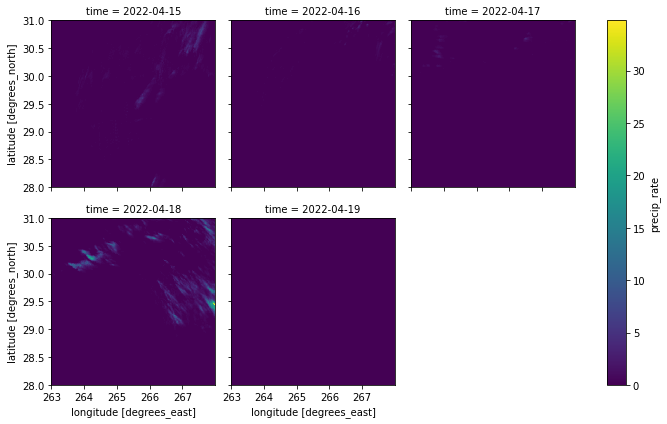

In [5]:
p = (
    ds.precip_rate.resample(time="1D")
    .sum()
    .plot(
        col="time",
        col_wrap=3,
    )
)

plt.show()

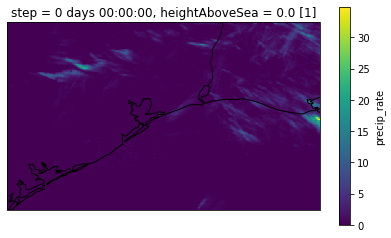

In [6]:
fig, ax = plt.subplots(
    subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(7, 4), nrows=1, ncols=1
)
ds.precip_rate.sum(dim="time").plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, alpha=0.8)
plt.show()